In [15]:
# installing dependencies
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.



  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [26]:
# importing librarires
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [17]:
#image_classification_part1.ipynb
#https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=MLZKVtE0dSfk
#https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

#pip3 install fastai==0.7.0
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt




ImportError: cannot import name 'keras_export' from 'tensorflow.python.util.tf_export' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\tf_export.py)

In [18]:
#Cat vs. Dog Image Classification
#Exercise 1: Building a Convnet from Scratch
#Estimated completion time: 20 minutes

#In this exercise, we will build a classifier model from scratch that is able to distinguish dogs from cats. We will follow these steps:

#Explore the example data
#Build a small convnet from scratch to solve our classification problem
#Evaluate training and validation accuracy

#Explore the Example Data

#!wget --no-check-certificate \
#    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#    -O /tmp/cats_and_dogs_filtered.zip

In [4]:
#import os
#import zipfile

#local_zip = '/tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

import os
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import random
import numpy as np

#local_zip = 'cats_and_dogs_filtered.zip'
local_zip = 'E:\Google Colab\Data_cat_dog\cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('E:\Google Colab\Data_cat_dog')
zip_ref.extractall('\Data_cat_dog')

#zip_ref.extractall('/tmp')

zip_ref.close()

#local_add = 'D:\downloads\cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_add,'r')
#zip_ref.extractall('D:\downloads')
#zip_ref.close()

#path = 'D:\downloads\cats_and_dogs_filtered'
#train_dir = os.path.join(path, 'train')
#validation_dir = os.path.join(path, 'validation')

In [5]:
#dog_validation_dir
#'D:\\downloads\\cats_and_dogs_filtered\\validation\\dogs'
train_dog_fname = os.listdir(dog_train_dir)
train_cat_fname = os.listdir(cat_train_dir)
#https://jovian.ai/lucifersingh31/cats-and-dogs


NameError: name 'dog_train_dir' is not defined

In [41]:
len(train_dog_fname)
len(train_cat_fname)


NameError: name 'train_dog_fname' is not defined

In [42]:
# construct addresses for two datasets 
base_dir = '/data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(validation_dir, 'cats')
val_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cats_fnames = os.listdir(train_cats_dir)
print(train_cats_fnames[:10])

train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_dogs_fnames[:10])

print('# of training cat examples: ', len(os.listdir(train_cats_dir)))
print('# of training dog examples: ', len(os.listdir(train_dogs_dir)))
print('# of validation cat examples: ', len(os.listdir(val_cats_dir)))
print('# of validation dog examples: ', len(os.listdir(val_dogs_dir)))



['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
# of training cat examples:  1000
# of training dog examples:  1000
# of validation cat examples:  500
# of validation dog examples:  500


In [44]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [47]:
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
              for fname in train_cat_fnames[pic_index-8:pic_index]
              ]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]
              ]

        
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    
    
#next_cat_pix = [os.path.join(train_cats_dir, fname) 
              #  for fname in train_cat_fnames[image_index-8:image_index]
            #   ]
#next_dog_pix = [os.path.join(train_dogs_dir, fname) 
           #     for fname in train_dog_fnames[image_index-8:image_index]
           #    ]


#for i, img_path in enumerate(next_cat_pix+next_dog_pic):
  # Set up subplot; subplot indices start at 1
 #   sp = plt.subplot(nrows, ncols, i + 1)
 #   sp.axis('Off') # Don't show axes (or gridlines)

 #   img = mpimg.imread(img_path)
 #   plt.imshow(img)

#plt.show()


NameError: name 'train_cat_fnames' is not defined

<Figure size 1152x1152 with 0 Axes>

In [34]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

ImportError: cannot import name 'keras_export' from 'tensorflow.python.util.tf_export' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\tf_export.py)

In [39]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

NameError: name 'layers' is not defined

In [40]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

NameError: name 'layers' is not defined

In [41]:
model.summary()

NameError: name 'model' is not defined

In [42]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

ImportError: cannot import name 'keras_export' from 'tensorflow.python.util.tf_export' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\tf_export.py)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

In [43]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

NameError: name 'model' is not defined

In [44]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

ImportError: cannot import name 'keras_export' from 'tensorflow.python.util.tf_export' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\tf_export.py)

In [45]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

NameError: name 'history' is not defined

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [ ]:
#end
#https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=651IgjLyo-Jx

In [21]:
import random
from keras.preprocessing.image import load_img

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files+dog_img_files)
img = load_img(img_path)

plt.imshow(img)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

Using TensorFlow backend.


ImportError: cannot import name 'keras_export' from 'tensorflow.python.util.tf_export' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\tf_export.py)

In [22]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'keras_export' from 'tensorflow.python.util.tf_export' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\tf_export.py)

In [23]:
# data pre-processing
train_datagen= ImageDataGenerator(
    rescale=1./255, # normalize pixel values to be between [0,1]
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2, 
    zoom_range = 0.2, 
    horizontal_flip= True)

# DO NOT augment the validation set
val_datagen= ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary') # binary labels for binary cross entropy loss

val_generator = val_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary') 

NameError: name 'ImageDataGenerator' is not defined

In [24]:
# build the CNN
input_layer = layers.Input(shape=(150, 150, 3))
# 16 3x3 filters
x = layers.Conv2D(16, 3, activation='relu')(input_layer) # max(0, x)
# max pooling with 2x2 window
x = layers.MaxPooling2D(2)(x)
# 32 3x3 filters
x = layers.Conv2D(32, 3, activation='relu')(x)
# max pooling with 2x2 window
x = layers.MaxPooling2D(2)(x)
# 64 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
# max pooling with 2x2 window
x = layers.MaxPooling2D(2)(x)
# flatten feature map to a 1D tensor 
x = layers.Flatten()(x)
# fully connected layer with relu activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
# add dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# output layer with a signal node and a sigmoid activation, 
# since we have a binary classification problem
output = layers.Dense(1, activation='sigmoid')(x) # [0,1]
model = Model(input_layer, output)
model.summary()

NameError: name 'layers' is not defined

In [25]:
# configurate training
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

NameError: name 'model' is not defined

In [26]:
# train model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=val_generator,
    validation_steps=50,
    verbose=2)

NameError: name 'model' is not defined

In [27]:
# evaluate result 
# no more overfitting, if we train for longer the accuracy would increase
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='training')
plt.plot(epochs, val_acc, label='validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, loss, label='training')
plt.plot(epochs, val_loss, label='validation')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [28]:
# try a couple of concrete examples
# pick a random image
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files+dog_img_files)
img = load_img(img_path, target_size=(150, 150))

# display the image
plt.imshow(img)
plt.grid(False)

# preprocess image to numpy array and normalize pizels
x = img_to_array(img) # numpy array with shape (150, 150, 3)
x = x.reshape((1,)+x.shape) # numpy array with shpae(1, 150, 150, 3)
x /= 255 # normalize pixel values to be in the range of [0,1])

# predict the category, 1 being dog and 0 being cat
model.predict(x)

NameError: name 'load_img' is not defined

In [ ]:
#Save model to Google Drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# save the model
model.save('cd.h5')

In [ ]:
# install tensorflow.js
!pip install tensorflowjs

In [ ]:
# creates some weight files and a json file containing architectures of the model
!mkdir model2
!tensorflowjs_converter --input_format keras cd.h5 model2/
!ls

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [8]:
# zip the model up
!zip -r modelKerasFinal.zip model2

In [ ]:
!ls model2

In [ ]:
#finish

In [ ]:
!ls

In [ ]:
# move file
!mv modelKerasFinal.zip gdrive/My\ Drive

In [ ]:
#https://colab.research.google.com/drive/1wRnji3spwaYScgKlElK6OzuSXgLQfA_P#scrollTo=onMRP_DzW2bY

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


NameError: name 'train_cat_fnames' is not defined

<Figure size 1152x1152 with 0 Axes>

In [ ]:
#Building a Small Convnet from Scratch to Get to 72% Accuracy
from tensorflow.keras import layers
from tensorflow.keras import Model


In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
#On top of it we stick two fully-connected layers. Because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)



In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
#Data Preprocessing
#Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

#As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).



from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

In [10]:
#Training
#Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 validation images. (This may take a few minutes to run.)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

NameError: name 'model' is not defined

In [ ]:
#Visualizing Intermediate Representations
#To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

#Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



In [ ]:
#Evaluating Accuracy and Loss for the Model
#Let's plot the training/validation accuracy and loss as collected during training:

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
#As you can see, we are overfitting like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

#Clean Up
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [ ]:
#import libraries
#!apt-get install
# # Imports
# pip install 
!conda install pip
!conda install matplotlib
!pip install matplotlib

!pip install pandas
!pip install numpy
!pip install os
!pip install glob
!pip install matplotlib-venn
!pip install libfluidsynth1
!pip install seaborn
!pip install scikit-learn

# For the latest nightly build:
!pip install tf-nightly
!pip install graphviz && pip install pydot
!pip install pydot
!pip install python-cartopy python3-cartopy

# For the current version: 

#!pip install --upgrade tensorflow
# For a specific version:
#!pip install tensorflow==1.2
# To determine which version you're using:
#!pip show tensorflow
#!pip install tensorflow==2.0.0-beta1
#!pip install tensorflow==2.0.0
# Upgrade Tensor Flow
# To determine which version you're using:
!pip show tensorflow
# For the current version: 
!pip install --upgrade tensorflow
# For a specific version:
!pip install tensorflow==2.6.8
# For the latest nightly build:
!pip install tf-nightly
	
 # !pip install Python 
!pip install Keras==2.1.6 
#!pip install TensorFlow==2.6.8
!pip install Coremltools  
    
# https://pypi.python.org/pypi/libarchive
        #!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!pip install python-libarchive
!git clone https://github.com/libarchive/libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!pip install graphviz && pip install pydot
#!apt-get -qq install -y graphviz && pip install pydot
import pydot
          #!apt-get -qq install python-cartopy python3-cartopy
!pip install python-cartopy python3-cartopy
import cartopy

!pip install pickle
#pip
!pip install pickle-mixin

#import library
import pickle

!pip install scipy-0.17.0-cp27-none-win_amd64.whl
!pip install --upgrade pip
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

!pip install seaborn
#run install_lib
#!apt-get install -y python3-seaborn
#!apt install python-scipy python-pandas

!pip install python3-seaborn
!pip install python-scipy python-pandas
!pip install seaborn
import seaborn
#python -m pip install 
!pip install matplotlib
!pip install -U scikit-learn
#python -m pip show scikit-learn # to see which version and where scikit-learn is installedpython -m pip freeze # to see all packages installed in the active virtualenvpython -c "import sklearn; sklearn.show_versions()"




In [6]:
import os
import glob
import pandas as pd
import numpy as np

In [1]:
#https://colab.research.google.com/github/idealo/imageatm/blob/master/examples/imageatm_cats_and_dogs.ipynb#scrollTo=ECK98OAuSQkc
# install imageatm via PyPi
!pip3 install imageatm


  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.3.1 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow-gpu 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.4 which is incompatible.
tensorflow-gpu 2.3.1 requires tensorboard<3,>=2.3.0, but you have tensorboard 1.13.1 which is incompatible.
metrics 0.3.3 requires pathspec==0.5.5, but you have pathspec 0.8.1 which is incompatible.
metrics 0.3.3 requires Pygments==2.2.0, but you have pygments 2.7.2 which is incompatible.
You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Created wheel for black: filename=black-20.8b1-py3-none-any.whl size=124186 sha256=61fd5bc9febde22f7fafe448cb9e0d3ab31d016d7ee4584c2d2d771e825bf161
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c5\85\79\f3af8daaf8037c0bf14beb3b7a1511a39b6e6902ca2aaf494e
Successfully built black
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
  Attempting uninstall: pathspec
    Found existing installation: pathspec 0.5.5
    Uninstalling pathspec-0.5.5:
      Successfully uninstalled pathspec-0.5.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Attempt

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import random
import numpy as np

In [4]:
# Load Data 
# download cats and dogs dataset

#!wget --no-check-certificate \
   # https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    # -O cats_and_dogs_filtered.zip
    
      
#E:\Google Colab\Classify\cats_and_dogs_filtered.zip \-O cats_and_dogs_filtered.zip


    
#Dataset_Train = pd.read_csv('E:/Google Colab/SAR_v2.3/SAR_v2.3_raw_all_xy.csv')
#Dataset_Test = pd.read_csv('E:/Google Colab/SAR_v2.3/SAR_v2.3_raw_test1.csv')


SyntaxError: unexpected character after line continuation character (<ipython-input-4-3d435e7825ec>, line 9)

In [6]:
#Cat Dog Filtered Keras Functional.ipynb
#https://colab.research.google.com/drive/1wRnji3spwaYScgKlElK6OzuSXgLQfA_P
#https://colab.research.google.com/drive/1wRnji3spwaYScgKlElK6OzuSXgLQfA_P

#C:\Users\User\data

# unzip downloaded file
local_zip = 'cats_and_dogs_filtered.zip'



#local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
    


In [7]:
# construct addresses for two datasets 
# base_dir = '/tmp/cats_and_dogs_filtered'

# base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(validation_dir, 'cats')
val_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cats_fnames = os.listdir(train_cats_dir)
print(train_cats_fnames[:10])

train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_dogs_fnames[:10])

print('# of training cat examples: ', len(os.listdir(train_cats_dir)))
print('# of training dog examples: ', len(os.listdir(train_dogs_dir)))
print('# of validation cat examples: ', len(os.listdir(val_cats_dir)))
print('# of validation dog examples: ', len(os.listdir(val_dogs_dir)))

NameError: name 'base_dir' is not defined

In [3]:
Dataset_Train = pd.read_csv("E:/Google Colab/SAR_v2.3/SAR_v2.3_raw_all_xy.csv")
Dataset_Train.head()

NameError: name 'pd' is not defined

In [ ]:
Dataset_Test = pd.read_csv("E:/Google Colab/SAR_v2.3/SAR_v2.3_raw_test.csv")
Dataset_Test.head()

In [ ]:
# https://github.com/bhimmetoglu/time-series-medicine/blob/master/HAR/HAR-LSTM.ipynb
# https://github.com/bhimmetoglu/time-series-medicine/blob/master/HAR/HAR-LSTM.ipynb
#utilities.py

In [ ]:
! pip install pandas

In [ ]:
!conda install pandas

In [ ]:
# Cara 2 load Data
#import libraries
import os
import glob
import pandas as pd
import numpy as np

file_path = "E:\Google Colab\SAR_v2.3"
read_files = glob.glob(os.path.join(files_path,"*.csv"))

np_array_values = []
for files in read_files:
    employee_data = pd.read_csv(files, header=0)
    np_array_values.append(employee_data)
    print(files)

In [ ]:
# Cara 3 load Data
#https://machinelearningmastery.com/how-to-load-and-explore-a-standard-human-activity-recognition-problem/

# load sequence for each subject, returns a list of numpy arrays
def load_dataset(prefix=''):
	subjects = list()
	directory = prefix + 'HAR/'
	for name in listdir(directory):
		filename = directory + '/' + name
		if not filename.endswith('.csv'):
			continue
		df = read_csv(filename, header=None)
		# drop row number
		values = df.values[:, 1:]
		subjects.append(values)
	return subjects

In [ ]:
#The complete example is listed below
# load dataset
from os import listdir
from pandas import read_csv
 
# load sequence for each subject, returns a list of numpy arrays
def load_dataset(prefix=''):
	subjects = list()
	directory = prefix + 'HAR/'
	for name in listdir(directory):
		filename = directory + '/' + name
		if not filename.endswith('.csv'):
			continue
		df = read_csv(filename, header=None)
		# drop row number
		values = df.values[:, 1:]
		subjects.append(values)
	return subjects
 
# load
subjects = load_dataset()
print('Loaded %d subjects' % len(subjects))

In [ ]:
# Cara 4 load Data
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#https://github.com/anas337/Human-Activity-Recognition-Using-Smartphones.github.io/blob/master/Machine%20Learning%20Part.ipynb
    
# Import default_timer to compute durations
from timeit import default_timer as timer
Debut=timer() # start time

import numpy as np # import numpy library
import pandas as pd # importing pandas library

# scrapping file paths
from glob import glob

# Allows the use of display() for DataFrames
from IPython.display import display 

from matplotlib import pyplot as plt # import matplot. pyplot to allow figure's plotting
#plt.style.use('bmh') # for better plots    
    
    
    

In [ ]:
# Cara 5 load Data
# scrapping data files path
#DF_paths_list=sorted(glob("Data/New-Data/full_Datasets_type_I_and_II/*"))
DF_paths_list=sorted(glob("E:/Google Colab/SAR_v2.3/*"))

display(DF_paths_list)

In [ ]:
# I # Importing Dataset
#https://github.com/anas337/Human-Activity-Recognition-Using-Smartphones.github.io/blob/master/Machine%20Learning%20Part.ipynb
# https://github.com/anas337/Human-Activity-Recognition-Using-Smartphones.github.io/blob/master/.ipynb_checkpoints/signal%20processing%20pipeline-checkpoint.ipynb
# loading datasets(these datasets are the outputs of the signal processing pipeline )
#Dataset_type_I_part1 = pd.read_csv('Data/New-Data/full_Datasets_type_I_and_II\\Dataset_I_part1.csv')
#Dataset_type_I_part2 = pd.read_csv('Data/New-Data/full_Datasets_type_I_and_II\\Dataset_I_part2.csv')
#Dataset_type_II_part1= pd.read_csv('Data/New-Data/full_Datasets_type_I_and_II\\Dataset_II_part1.csv')
#Dataset_type_II_part2= pd.read_csv('Data/New-Data/full_Datasets_type_I_and_II\\Dataset_II_part2.csv')

Dataset_Train = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv')
Dataset_Test = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv')

# select parts two be conctenated
#frames_I=[Dataset_type_I_part1,Dataset_type_I_part2]
#frames_II=[Dataset_type_II_part1,Dataset_type_II_part2]

frames_Train =[Dataset_Train]
frames_Test =[Dataset_Test]

# concatenate each dataframes' parts
#Dataset_type_I=pd.concat(frames_I)
#Dataset_type_II=pd.concat(frames_II)

Dataset_Train=pd.concat(frames_Train)
Dataset_Test=pd.concat(frames_Test)

# index reset
#Dataset_type_I.reset_index(level=0, drop=True, inplace=True)
#Dataset_type_II.reset_index(level=0, drop=True, inplace=True)
Dataset_Train.reset_index(level=0, drop=True, inplace=True)
Dataset_Test.reset_index(level=0, drop=True, inplace=True)




In [ ]:
# II # Datasets Exploration and Exploratory Visualizations

# II # 1 # Datapoints number per each tuple (user,activity) function

# This function returns a table includes the number of 
# windows per each tuple(user_id , activity id) included in the dataset 

def num_row_user_act(Df):
    
    user_Ids=sorted(Df['user_Id'].unique()) # extracting and sorting unqiue user ids 
    activity_Ids=sorted(Df['activity_Id'].unique()) # extracting and sorting unqiue activity ids 
    act_columns=['Activity '+str(int(Id)) for Id in activity_Ids ] # defining column names used in output table
    
    if len(activity_Ids)==7: # adapting column names in case the function deals with dataset type III
        act_columns=act_columns[0:6]+['P_Transitions'] 
    
    users_index=['User '+ str(int(Id)) for Id in user_Ids] # defining rows names used in output table
    
    # counting the number of windows per each tuple(user_id,activity_id)
    # store these values in 2D numpy array
    data=np.array([ [len(Df[(Df["user_Id"]== user_ID) &(Df["activity_Id"]==activity_ID)]) 
               for activity_ID in activity_Ids ] for user_ID in user_Ids])
    
    # Create a pandas dataframe from the array above
    win_per_act_per_user=pd.DataFrame(data = data,columns=act_columns,index=users_index)
    
    
    return win_per_act_per_user # returns the dataframe

In [ ]:
# II # 2 # Visualizing Activities Distribution
# This function returns the weights activity and visualize the distribution of a column
# This function will be applied only to target columns
def visualize_column(Df,column):
    
    labels= sorted(Df[column].unique()) # extracting and sorting activity unique ids
    Als_dict={ key: len(Df[Df[column]==key]) for key in labels} # counting the number of windows per activity
    data=[Als_dict[key] for key in labels] # sorting these numbers
    
    weights=np.array(data)/float(np.array(data).sum()) # calculating weights of each activity
    
    columns=["Activity "+str(int(key)) for key in labels] # defining columns of weights' table
    
    Df_weights=pd.DataFrame(data=None,columns=columns)# defining an empty dataframe with column names
    Df_weights.loc['Weights']=weights # appending weights row
    
    print("_____ The weights of each activity _____")
    display(Df_weights) # displying weights table
    print("")
    plt.bar(columns,data) # ploting activity distribution
    plt.xlabel('Activity Labels') # set X axis info
    plt.ylabel('Number of Data points') # set Y axis info
    plt.title('Number of Data points per activity') # set the figure's title
    plt.show() # showing the figure

In [ ]:
# III # Data Exploration PipeLine
def data_exploration_pipeline(Dataset,typ,outliers):
    # inputs:
    #        Dataset: a pandas dataframe can be a full dataset (Train), 
    #               cleaned dataset(Train, Test), outliers dataset (Train, Test)
    
    #        typ    : integer type of the dataset possible values: 1(for dataset Train, Test), 
    #        outliers: Boolean if true dataset we are dealing with is an outlier dataset(contain outlier values)         
    
    # columns names of the dataset
    columns=Dataset.columns
    
    if not outliers:  # in case we are not dealing with outliers datasets  
        # Adapting the dataset name switch the typ
        if typ==1:
            Dataset_name="Dataset_Train "
        if typ==2:
            Dataset_name="Dataset_Test "
       
    else:# in case we are dealing with outliers
        
        # adapting the dataset names switch the case
        if typ==1:
            Dataset_name="Outliers of Dataset_Train "
        if typ==2:
            Dataset_name="Outliers of Dataset_Test "
    
    # general info about the dataset: number of rows and columns
    print(  Dataset_name+'has a shape of: '+ str(Dataset.shape[0]) +' rows and '+str(Dataset.shape[1])+' columns')
    print("")
    print("")    
    print("")
    
    if not outliers: # in case dataset is not an outlier dataset
        print("The first 3 rows of "+Dataset_name +":")
        display(Dataset.iloc[0:3]) # display the first 3 rows
        print("")
        print("")    
        print("")
        print("rows 500, 501, 502 of "+Dataset_name +":")
        display(Dataset.iloc[500:503]) # display rows 500,501 and 502
        print("")
        print("")    
        print("")
        print("Description of the 10 first features:")
        display(Dataset.describe()[columns[0:10]]) # statistics of the first ten time domain features
        print("")
        print("")    
        print("")
        print("Description of the 10 first frequency features:")
        display(Dataset.describe()[columns[265:275]]) # statistics of the first ten frequency domain features
        print("")
        print("")    
        print("")
    Stats= num_row_user_act(Dataset)# generate number of windows per each tuple (user,activity)
    print("Number of windows per user and per each activity:")
    display(Stats)# display the table
    print("")
    print("")    
    print("")
    print("Statistics of table above:")
    display(Stats.describe())# table's statics
    print("")
    print("")    
    print("")
    visualize_column(Dataset,"activity_Id") # visualize activity distribution of the dataset

In [ ]:
# apply the data_exploration_pipeline to dataset type 1
data_exploration_pipeline(Dataset_Train,1,False)

In [ ]:
# apply the data_exploration_pipeline to dataset type 1
data_exploration_pipeline(Dataset_Test,1,False)

In [ ]:
# III # Data Preprocessing

# III.1 Handling Outliers
#####################################################################################
def extract_drop_outliers(Df,threshold,typ):
    #Df: pandas dataframe (Dataset type I or Dataset type II)
    # Threshold: integer : if the number of features detected as ouliers in row exceeds the threshold 
    #                      therow will be considered as "outlier row"
    
    max_range=len(Df["activity_Id"].unique()) # number of unique activities in Df
    
    columns=Df.columns # column names of the dataset
    
    outliers={} # dictionary will contain number of outliers per row . keys are rows' indexes
    for i in range(1,max_range+1):# iterate throw each activity type in the dataset
        
        Df_A=Df[Df['activity_Id']==i] # select rows related to this activity
        
        for column in columns[:-2]:# iterate throw features columns only in Df_A
            
            q1= Df_A[column].describe()['25%'] # the value of the first quartile of a column in Df_A
            
            q3= Df_A[column].describe()['75%'] # the value of the third quartile of a column in Df_A
            
            low_threshold=q1-1.5*(q3-q1) # define low threshold to detect bottom outliers of a column
            high_threshold=q3+1.5*(q3-q1) # define high threshold to detect top outliers of a column
            
            for e in Df_A.index :# iterate throw Df_A indexes
                
                if (Df[column].iloc[e]>high_threshold or Df[column].iloc[e]<low_threshold) :# if value is an outlier
                    
                    if e in outliers.keys(): # if the row index is alread exist in outliers dictionary
                        outliers[e]=outliers[e]+1 # increse the number of ouliers for this row
                    else:# if the row index does not exist yet in  outliers dic keys
                        outliers[e]=1 # add the key with outlier number =1
    
    indexs=np.array(sorted(outliers.keys())) # rows indexes contain outlier values sorted from low to high
    values=np.array([outliers[indexs[i]] for i in range(len(indexs))]) # number of outliers related to each row

    indexs_droped=indexs[values>threshold]# store indexes having number of outliers exceeding the threshold in a list
    
    # Build outliers dataframe using row's indexes
    outliers_data=np.array([list(Df.iloc[indexs_droped[i]]) for i in range(len(indexs_droped))])
    outliers_Df= pd.DataFrame(data=outliers_data,columns= columns)
    
    # generate the clean dataframe by droping outliers from the original dataframe
    clean_Df=Df.drop(indexs_droped,0,)
    
    # adapting the name of the dataset switch the case
    if typ==1:
        dataset_name='Dataset_Train'
    if typ==2:
        dataset_name="Dataset_Test"
    
    #### report
    print("")
    print("_______________________________ Original Data Frame info...____________________________________")
    print('Number of rows in the original dataframe '+dataset_name+':',len(Df) ) # original dataset lenght
    print("")
    print("")
    visualize_column(Df,'activity_Id') # activity distribution of the original dataset
    print("")
    print("")
    print("________________________________ Outliers info...________________________________________________")
    print("A row is considered as outlier if the number of its outliers exceeds: "+str(threshold)) # threshold info
    print('Number of rows droped :',len(indexs_droped) ) # number of rows considered as outliers
    print("")
    print("")
    data_exploration_pipeline(outliers_Df,typ,True) # Apply the data exploration pipeline to outliers dataframe
    print("")
    print("")
    print ("________________________________ Cleaned+" +dataset_name+" Dataframe info...________________________________________")
    print ('Number of rows in the clean dataframe '+dataset_name+':',len(clean_Df)) # clean dataframe info
    print("")
    print("")
    print("")
    print("")
    data_exploration_pipeline(clean_Df,typ,False)# apply the data exploration pipeline to the clean dataframe
    return clean_Df # return the clean dataset

In [ ]:
# apply extract drop outliers to dataset type I
clean_Dataset_Test = extract_drop_outliers(Dataset_Test,100,1)# store the clean dataframe

In [ ]:
# apply drop extract outliers to dataset type
clean_Dataset_Train = extract_drop_outliers(Dataset_Train,100,2)# store the clean dataframe

In [ ]:
# III.2 Features Scaling
#################################################################################
def scaling_array(oneD_signal):
    # inputs: 1D numpy array (one column)
    maximum=oneD_signal.max() # maximum of the column
    minimum=oneD_signal.min() # min value of the column
    Difference=float(maximum-minimum) # max-min
    # scaling formula: 2 * (x_i-minimum)/(maximum -minimum)
    # apply the scaling formula to each value in the column
    scaled_signal=np.array([((float(oneD_signal[i])-minimum)/float(Difference))*2 -1 for i in range(len(oneD_signal))])
    
    #return the scaled array
    return scaled_signal

def scaling_DF(data_frame):
    # input : pandas dataframe (clean datasets type I or II)
    columns=data_frame.columns# column names
    # apply the scaling function to each feature columns only
    scaled_array=np.apply_along_axis(scaling_array,0,np.array(data_frame[columns[:-2]]))
    
    # buid the scaled dataset
    scaled_df=pd.DataFrame(data=scaled_array,columns=columns[:-2])
    
    # the user and activity ids columns
    scaled_df['activity_Id']=np.array(data_frame['activity_Id'])
    scaled_df['user_Id']=np.array(data_frame['user_Id'])
    
    return scaled_df # return the scaled dataset

###################################################################################

In [ ]:
# apply the scaling function to cleaned dataset type I
scaled_type_I=scaling_DF(clean_Dataset_type_I)

# explore the scaled dataset type I
data_exploration_pipeline(scaled_type_I,1,False)

In [ ]:
# apply the scaling function to cleaned dataset 
scaled_Train=scaling_DF(clean_Dataset_Train)

# explore the scaled dataset 
data_exploration_pipeline(scaled_Train,2,False)

In [ ]:
# VI Dataset 
# VI.1 Data set Generation
act_labels=list(scaled_type_II['activity_Id']) # extract activity labels from scaled type II (ids from 1 to 12)

for i in range(len(act_labels)):# iterate throw each activity label
    
    if act_labels[i]>6: # if activity label belongs to postural transitions ids from 7 to 12
        act_labels[i]=7 # the target will be replaced by the id=7 (postural transition)

# build dataset type III by replacing the activity id column by the new column create above
scaled_Train=pd.DataFrame(data=np.array(scaled_type_II),columns=scaled_type_II.columns)
scaled_Train['activity_Id']=np.array(act_labels)

In [ ]:
# VI.2 Exploration
# apply the data exploration pipeline to scaled dataset 
data_exploration_pipeline(scaled_Train,3,False)

In [ ]:
# V. Train-Test Datasets
# V.1. Train-Test Datasets creation
# Unique Users Ids used for training and testing

# volunteersids used for training
Train_users =[1,3,5,6,7,8,10,11,14,15,27,17,21,29,30,16,19,20,22,23,25,]

#{"21" , "17", "29", "13" , "21" , "27" , "6" , "15" , "12" , "36" , "10" , "35" , "11" , "16" , "5", "21" , "28" , "26" , "14" , "24" , "9" , "23" , "4" , "30" , "34" , "8" , "31" , "21" , "3" , "11" , "1" , "25" , "9" , "2" , "7" , "19"} 

# volunteers ids used for testing
Test_users = [2,4,9,12,13,26,18,28,24,]

In [ ]:
#Creating train and test datasets
def create_training_testing_data(scaled_Df,train_users,test_users,typ):
    # inputs:
    #        scaled_DF : pandas dataframe already scaled
    #       train_users: list of integers contains train user ids 
    #       train_users: list of integers contains test user ids 
    #       typ        : integer from 1 to 3 (depending on the dataset type)
    
    # select rows related to train users ids store them in numpy array
    array_train =np.array([np.array(scaled_Df.iloc[i]) 
                           for i in range(len(scaled_Df)) if int(scaled_Df['user_Id'].iloc[i]) in train_users])
    # select rows related to test users ids store them in numpy array
    array_test  =np.array([np.array(scaled_Df.iloc[i]) 
                           for i in range(len(scaled_Df)) if int(scaled_Df['user_Id'].iloc[i]) in test_users])
    
    # columns names
    columns=scaled_Df.columns
    
    # build train and test dataframes from numpy arrays above
    Df_train= pd.DataFrame(data= array_train,columns=columns)
    Df_test = pd.DataFrame(data= array_test,columns=columns)
    
    
    # train features dataframe
    Df_train_features= Df_train[columns[:-2]]
    # train labels dataframe
    Df_train_labels  = Df_train[columns[-2:-1]]
    # train user id labels dataframe
    Df_train_users   = Df_train[columns[-1]]
    
    # test features dataframe
    Df_test_features= Df_test[columns[:-2]]
    # test labels dataframe
    Df_test_labels  = Df_test[columns[-2:-1]]
    # test user id labels dataframe
    Df_test_users   = Df_test[columns[-1]]
    
    # 2D numpy array : train features
    X_train =np.array(Df_train_features)
    
    # 2D numpy array : test features
    X_test  =np.array(Df_test_features)
    
    # 1D numpy array : train labels
    y_train= np.array(Df_train_labels['activity_Id'])
    
    # 1D numpy array : test labels
    y_test = np.array(Df_test_labels ['activity_Id'])
    
    # adapting the dataset name switch the case
    if typ==1:
           Dataset_name="Dataset_Train"
    if typ==2:
           Dataset_name="Dataset_Test"
   
    
    print("")
    print("______________________________"+Dataset_name+" Train features & labels info:______________________________________")
    print("")
    visualize_column(Df_train,'activity_Id')# visualize activity distribution of train dataframe
    print("")
    print("______________________________Test features & labels info:______________________________________")
    print("")
    visualize_column(Df_test,'activity_Id') # visualize the activity distribution of the test dataframe
    
    return  [X_train, X_test, y_train, y_test] # return train and test numpy arrays

In [ ]:
# dictionary will contain train and test files of each dataframe type
train_test_files_dic={}

In [ ]:

# apply create_training_testing_data to scaled dataset type I
[X_1_train, X_1_test, y_1_train, y_1_test] = create_training_testing_data(scaled_type_I,train_users,test_users,1)

In [ ]:
# store train test files type I in the dictionary 
train_test_files_dic[1]=[X_1_train, X_1_test, y_1_train, y_1_test]

In [ ]:

# apply create_training_testing_data to scaled dataset 
[X_2_train, X_2_test, y_2_train, y_2_test] = create_training_testing_data(scaled_type_II,train_users,test_users,2)

In [ ]:
# store train test files type II in the dictionary 
train_test_files_dic[2]= [X_2_train, X_2_test, y_2_train, y_2_test]

In [ ]:
# apply create_training_testing_data to scaled dataset 
[X_3_train, X_3_test, y_3_train, y_3_test] = create_training_testing_data(scaled_type_III,train_users,test_users,3)

In [ ]:
# VI. Train-Test PipeLine

from sklearn.naive_bayes import GaussianNB as NB # import gaussian naive bayes classifier
from sklearn.tree import DecisionTreeClassifier as DTC # import decision tree classifier
from sklearn.linear_model import LogisticRegression as LR # import logistic regression classifier

from sklearn.metrics import accuracy_score as accuracy # import accuracy score
from sklearn.metrics import confusion_matrix as cm # import confusion matrix

# intialize models
Benchmark_model =NB()
Clf1=DTC(random_state=337)
Clf2=LR(random_state=337)

In [ ]:
# Define the adpted confusion matrix
def full_confusion_matrix(Df): 
    # input: 
    #   Df : pandas dataframe, the contingency table resulted from the confusion matrix defined earlier as cm
    
    columns=Df.columns # activity names
    # add new columns containing detailed scores
    new_columns=list(columns)+['data points number','precision %','sensitivity %','specificity %']
    
    # create the index from the same old columns add an other row called total
    new_index=list(columns)+['Total']
    
    # intialize the confustion matrix dataframe
    new_Df=pd.DataFrame(data=None,columns=new_columns, index= new_index)
    # intilize values
    total_TP=0 # sum of true positives
    total_FN=0 # sum of false negatives
    total_data_points_number=0 # total number of datapoints
    
    for column in columns:
        
        TP=Df.loc[column][column] # extract true postives from the contingency table
        FN=Df.loc[column].sum()-TP # calculate FN(false negatives)
        FP=Df[column].sum()-TP # calculate FP(false positives)
        TN=(Df.sum()).sum()-TP-FN-FP # calculate TN(true negatives)
        class_data_points=TP+FN  # number of datapoints per activity
        # precision score in %
        precision= TP/float(TP+FP) * 100
        # Recall or sensitivity in %
        sensitivity= TP/float(TP+FN) *100
        # sepecificity score in %
        specificity=TN/float(TN+FP) * 100
        
        new_row =list(Df.loc[column])+[class_data_points,precision,sensitivity,specificity]# contenate new scores in one row
        new_Df.loc[column]=new_row # append the row to the dataframe
        
        # update intialized values
        total_data_points_number= total_data_points_number+class_data_points 
        total_TP=total_TP+TP
        total_FN=total_FN+FN
    
    # after iterting throw all activity types
    # the general accuracy of the model is:
    total_accuracy= total_TP/float(total_TP+total_FN) * 100
    
    # add total values to the dataframe
    new_Df.loc['Total'] [['data points number','precision %','sensitivity %','specificity %']]=['data points number='+str(total_data_points_number),'','','accuracy= '+str(total_accuracy)[0:6]+'%']
    new_Df.loc['Total'][columns]=['' for i in range(len(columns))]
    
    return new_Df # return the adapted confusion matrix


In [ ]:
def train_predict(classifier, sample_size, X_train, X_test, y_train,  y_test,typ): 
    
    # inputs:
    #   classifier: the learning algorithm to be trained and predicted on
    #   sample_size: the size of samples (number) to be drawn from training set
    #   X_train: features training set
    #   y_train: Activity_number_ID training set
    #   X_test: features testing set
    #   y_test: Activity_number_ID testing set
    
    # Empty dictionary will include all dataframes and info related to training and testing.
    results = {}
    
    # Fitting the classifier to the training data using slicing with 'sample_size'
    start= timer() # Get start time
    classifier = classifier.fit(X_train[0:sample_size,:],y_train[0:sample_size])# fiting the classfier
    end = timer() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 3000 training samples(X_train) using .predict()
    start = timer() # Get start time
    predictions_test = classifier.predict(X_test) # predict
    predictions_train =classifier.predict(X_train[:3000,:])
    end = timer() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] =end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy(y_train[:3000],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy(y_test,predictions_test)
    
    # Adapting the confusion matrix shape to the type of data used
    if typ==1:
        #confusion_matrix=cm(y_test, predictions_test, labels=[1,2,3,4,5,6], sample_weight=None) # 
        confusion_matrix=cm(y_test, predictions_test, labels=[1,2,3,4,5,6,7,8,9,10,11,12], sample_weight=None) # 
       # columns=['WK','WU','WD','SI','ST','LD']
        # index=['WK','WU','WD','SI','ST','LD']
        columns = ['HaS','HiA','ThS','HiF','LuR','LuF','Abd','Add','HoF','HoE','VeF','ShI']
        index = ['HaS','HiA','ThS','HiF','LuR','LuF','Abd','Add','HoF','HoE','VeF','ShI']
    if typ==2:
        confusion_matrix=cm(y_test, predictions_test, labels=[1,2,3,4,5,6,7,8,9,10,11,12], sample_weight=None)
       # columns=['WK','WU','WD','SI','ST','LD','St-Si','Si-St','Si-Li','Li-Si','St-Li','Li-St']
        # index=  ['WK','WU','WD','SI','ST','LD','St-Si','Si-St','Si-Li','Li-Si','St-Li','Li-St'] 
        columns = ['HaS','HiA','ThS','HiF','LuR','LuF','Abd','Add','HoF','HoE','VeF','ShI']
        index = ['HaS','HiA','ThS','HiF','LuR','LuF','Abd','Add','HoF','HoE','VeF','ShI']
    if typ==3:   
        confusion_matrix=cm(y_test, predictions_test, labels=[1,2,3,4,5,6,7], sample_weight=None)
       # columns=['WK','WU','WD','SI','ST','LD','PT']
      #  index=['WK','WU','WD','SI','ST','LD','PT']
        columns = ['HaS','HiA','ThS','HiF','LuR','LuF','Abd','Add','HoF','HoE','VeF','ShI']
        index = ['HaS','HiA','ThS','HiF','LuR','LuF','Abd','Add','HoF','HoE','VeF','ShI']
    
    if sample_size==len(X_train):# if 100% of training is achieved
        # apply the confusion matrix function to the last contingency table generated
        confusion_matrix_df=(pd.DataFrame(data=confusion_matrix,columns=columns,index=index)).pipe(full_confusion_matrix)
    else:# if not
        # create a dataframe from the contingency table
        confusion_matrix_df=pd.DataFrame(data=confusion_matrix,columns=columns,index=index)
        
    # Return the results
    return (results,confusion_matrix_df)


In [ ]:
def train_test_report(classifier,dataset_type):
    # Inputs:
    #  classifier: model will be trained tested and evaluated on all sample sizes
    #  Dataset_type: "All"  or integers 1,2,3 
    # if "All" the classifier will be trained, tested and evaluated on all datasets
    # if integer 1, 2 or 3: the classifier the classifier will be trained, tested and evaluated on one dataset(I,II or III)
    
    if dataset_type!='All': # dataset type equal to 1 ,2 or 3
        # extract train and test files related to dataset type
        new_dic={dataset_type:train_test_files_dic[dataset_type]}
    
    else:# the model will be trained , tested and evaluted on all datasets
        new_dic=train_test_files_dic # import all train and test files
    
    for key in sorted(new_dic.keys()):# iterating throw dataset types
        clf=classifier # reintialize the classifier
        # adapt the dataset name switch the case
        if key==1:
            Dataset_name='Dataset_Train'
        if key==2:
            Dataset_name='Dataset_Test'
       
        
        files = new_dic[key] # copy train and test files related to the dataset type
        # create a temporal dictionary where train, test and evaluation results will be stored
        results = {}
        print("_____________________"+Dataset_name+" Training and Testing______________________")
        print("")
        
        # copy train and test files
        X_train, X_test, y_train, y_test,= files[0], files[1], files[2], files[3]
        # extract the name of the classifier
        clf_name = clf.__class__.__name__
        
        # training started
        print("{} started training....".format(clf_name) )   
        
        results[clf_name] = {}
        # generate sample sizes
        samples_10 = int(len(X_train)/10) # 10%
        samples_50 = int(len(X_train)/2) # 50%
        samples_100 = int(len(X_train)) # 100%
        
        
        for i, samples in enumerate([samples_10, samples_50, samples_100]): # iterate throw each sample size
            print("...")
            if samples==len(X_train):# when 100% of training will be achieved
                # store results related to the classier and sample size in results dictionary
                # store the full confusion matrix
                results[clf_name][i],confusion_matrix = train_predict(clf, samples, X_train, X_test, y_train, y_test,key)
            else:# if not
                # store results related to the classier and sample size in results dictionary
                results[clf_name][i]= train_predict(clf, samples, X_train,X_test, y_train,  y_test,key)[0]

        print( "Success: {} Finished Training and Testing.".format(clf_name))
        print("")
        print ("________"+clf_name+" results:__________")
        print("")
        print("")
        print("Accuracy and duration per training size")
        # display train and test results
        display(pd.DataFrame(results[clf_name]).rename(columns={0:'10% of train', 1:'50% of train', 2:'100% of train'}))
        print("")
        print("Confusion Matrix Sensitivity and Recall when 100% of train is achieved")
        # display the full confusion matrix results
        display(confusion_matrix)
        print("____________________________________________________________________")
        print("")
        print("")

In [ ]:
# VII. Benchmark Model
# training, testing and evaluating the benchmark model on all datasets
train_test_report(Benchmark_model,'All')

In [ ]:
# VIII. Elected Models
# Decision Tree Classifier

# training, testing and evaluating Decision tree classifier on all datasets
train_test_report(Clf1,'All')

In [ ]:
# Logistic Regression Classifier
# training, testing and evaluating Logistic Regression  classifier on all datasets
train_test_report(Clf2,'All')

In [ ]:
# IX. Tunning Parameters
from sklearn.model_selection import GridSearchCV # import grid search cv to tune parameters
clf_chosen=LR(random_state=337) # intialize the LR model

# scaled dataset type I activity weights
weights_dic_1= {1:0.179248,2:0.15867,3:0.144265,4:0.161919,5:0.17849,6:0.177407}

# scaled dataset type II activity weights
weights_dic_2={1 : 0.164576, 2 : 0.150152, 3 : 0.142537, 4 : 0.145225,
               5 : 0.156961, 6 : 0.155169, 7 : 0.012991, 8 : 0.009138,
               9 : 0.015857, 10: 0.015320, 11: 0.018903,12 : 0.013170}
# scaled dataset type III activity weights
weights_dic_3={1:0.164576,2:0.150152,3:0.142537,4:0.145225,5:0.156961,6:0.155169,7:0.085379}

# possible values for the parameter "class_weight" for each dataset

class_weight_1=[None,weights_dic_1] # scaled dataset I
class_weight_2=[None,weights_dic_2] # scaled dataset II
class_weight_3=[None,weights_dic_3] # scaled dataset III

# possible parameters dictionary for each dataset:

# dataset type I
params_1={'penalty':['l2'], 'solver':['newton-cg','sag','lbfgs'],'dual':[False],
          'multi_class':['ovr','multinomial'],'class_weight':class_weight_1}
params_2={'penalty':['l2'], 'solver':['liblinear'],'dual':[True],'multi_class':['ovr'],'class_weight':class_weight_1}
params_3={'penalty':['l1'], 'solver':['liblinear'],'dual':[False],'multi_class':['ovr'],'class_weight':class_weight_1}

# dataset type II
params_4={'penalty':['l2'], 'solver':['newton-cg','sag','lbfgs'],'dual':[False],
          'multi_class':['ovr','multinomial'],'class_weight':class_weight_2}
params_5={'penalty':['l2'], 'solver':['liblinear'],'dual':[True],'multi_class':['ovr'],'class_weight':class_weight_2}
params_6={'penalty':['l1'], 'solver':['liblinear'],'dual':[False],'multi_class':['ovr'],'class_weight':class_weight_2}

# dataset type III
params_7={'penalty':['l2'], 'solver':['newton-cg','sag','lbfgs'],'dual':[False],
          'multi_class':['ovr','multinomial'],'class_weight':class_weight_3}
params_8={'penalty':['l2'], 'solver':['liblinear'],'dual':[True],'multi_class':['ovr'],'class_weight':class_weight_3}
params_9={'penalty':['l1'], 'solver':['liblinear'],'dual':[False],'multi_class':['ovr'],'class_weight':class_weight_3}

In [ ]:
# Dataset type I:
# insert parameters in the grid seach for each path 
# store each future results in a model
tuned_model1 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_1)
tuned_model2 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_2)
tuned_model3 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_3)

# train models
tuned_model1.fit(X_1_train,y_1_train)
tuned_model2.fit(X_1_train,y_1_train)
tuned_model3.fit(X_1_train,y_1_train)

# display best parameters of each model
print("Tuned model 1 best params:",tuned_model1.best_params_)
print("Tuned model 2 best params:",tuned_model2.best_params_)
print("Tuned model 3 best params:",tuned_model3.best_params_)

# store predictions and generate accuracies for each model
predictions1=tuned_model1.predict(X_1_test)
print( "tuned model 1 accuracy:",accuracy(y_1_test,predictions1))

predictions2=tuned_model2.predict(X_1_test)
print( "tuned model 2 accuracy:",accuracy(y_1_test,predictions2))

predictions3 = tuned_model3.predict(X_1_test)
print( "tuned model 3 accuracy:",accuracy(y_1_test,predictions3))

In [ ]:
# Dataset : same process will be applied for dataset 
tuned_model4 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_4)
tuned_model5 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_5)
tuned_model6 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_6)

tuned_model4.fit(X_2_train,y_2_train)
tuned_model5.fit(X_2_train,y_2_train)
tuned_model6.fit(X_2_train,y_2_train)

print("Tuned model 4 best params:",tuned_model4.best_params_)
print("Tuned model 5 best params:",tuned_model5.best_params_)
print("Tuned model 6 best params:",tuned_model6.best_params_)

predictions4=tuned_model4.predict(X_2_test)
print( "tuned model 4 accuracy:",accuracy(y_2_test,predictions4))

predictions5=tuned_model5.predict(X_2_test)
print( "tuned model 5 accuracy:",accuracy(y_2_test,predictions5))

predictions6=tuned_model6.predict(X_2_test)
print( "tuned model 6 accuracy:",accuracy(y_2_test,predictions6))

In [ ]:
# Dataset : same process will be applied for dataset 

tuned_model7 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_7)
tuned_model8 =GridSearchCV(estimator =clf_chosen,
                       param_grid=params_8)
tuned_model9 =GridSearchCV(estimator =clf_chosen,
                          param_grid=params_9)

tuned_model7.fit(X_3_train,y_3_train)
tuned_model8.fit(X_3_train,y_3_train)
tuned_model9.fit(X_3_train,y_3_train)

print("Tuned model 7 best params:",tuned_model7.best_params_)
print("Tuned model 8 best params:",tuned_model8.best_params_)
print("Tuned model 9 best params:",tuned_model9.best_params_)

predictions7=tuned_model7.predict(X_3_test)
print( "tuned model 7 accuracy:",accuracy(y_3_test,predictions7))

predictions8=tuned_model8.predict(X_3_test)
print( "tuned model 8 accuracy:",accuracy(y_3_test,predictions8))

predictions9=tuned_model9.predict(X_3_test)
print( "tuned model 9 accuracy:",accuracy(y_3_test,predictions9))

In [ ]:
# Hyperparameter C Search:
# Warning: Running duration of this part is a least 5 hours

# C values from 0.1 to 20 with a step of 0.1
C_values=[(i+1)*0.1 for i in range(200)]       

def max_c(results,typ):
    # inputs:
    #   results: dictionary={c_value: accuracy of the model}
    #   typ: float possible values are: 1,2,3 and 3.5
    
    # extract C values
    C_values=sorted(results.keys())
    # extract related accuracies 
    accuracy_values=[results[key] for key in C_values]
    
    # extract c value having the maximum accuracy
    max_c=C_values[np.array(accuracy_values).argmax()]
    
    # display results
    print("max accuracy :",max(accuracy_values))
    print("C value:",max_c)
    
    plt.plot(C_values,accuracy_values)# plot the curve
    plt.xlabel("C values")  # set X axis info
    plt.ylabel("accuracy") # set Y axis info
    
    # Set the right title switch the case
    if typ==1:# if dataset type I
        plt.title("model 1 accuracy variation on dataset_Train")
    if typ==2:# if dataset type II
        plt.title("model 5 accuracy variation on dataset_Test")
    
   

In [ ]:
# To run the search function below for dataset type 1 decomment the last line

# Dataset type I
def lookup_best_c(x_train,y_train,x_test,y_test):
    accuracy_results={} # empty dictionary will contain c values and accuracies related
    
    for value in C_values:# iterate throw each C value
        #tuned model 1 best parameters + C variable
        tmp_model=LR(solver='lbfgs',class_weight= None,multi_class= 'ovr', 
                  dual=False, penalty= 'l2',random_state=337,C=value)
        # train the model
        tmp_model.fit(x_train,y_train)
        
        # predicting activity labels
        tmp_predictions=tmp_model.predict(x_test)
        # accuracy score
        tmp_accuracy=accuracy(tmp_predictions,y_test)
        # store the tuple c_value and accuracy value in the dictionary
        accuracy_results[value]=tmp_accuracy
    
    # after iterating throw all c values
    return accuracy_results # return results

# apply lookup_best_c to train and test files type I
#results_I = lookup_best_c(X_1_train,y_1_train,X_1_test,y_1_test)

In [ ]:
# visualizing results
#max_c(results_I,1)

In [ ]:
# To run the search function below for dataset type 2 models decomment the last line
# same process will be applied for dataset type II model
def lookup_best_c(x_train,y_train,x_test,y_test):
    i=0
    accuracy_results={}
    for value in C_values:
        
        #tuned model 5 best parameters + C variable
        tmp_model=LR(solver='liblinear', class_weight= None, multi_class= 'ovr',
                  dual= True, penalty= 'l2',random_state=337,C=value)
        tmp_model.fit(x_train,y_train)
        tmp_predictions=tmp_model.predict(x_test)
        tmp_accuracy=accuracy(tmp_predictions,y_test)
        accuracy_results[value]=tmp_accuracy
    return accuracy_results

# apply lookup_best_c to train and test files type II
#results_II =lookup_best_c(X_2_train,y_2_train,X_2_test,y_2_test)

In [ ]:
# To visualize results_II, Decomment the last line of the cell below
# visualizing results
#max_c(results_II,2)

In [ ]:
# Final Models
final_model_I=LR(solver='lbfgs',class_weight= None,multi_class= 'ovr', 
                  dual=False, penalty= 'l2',random_state=337,C=4.7)
final_model_II=LR(solver='liblinear', class_weight= None, multi_class= 'ovr',
                  dual= True, penalty= 'l2',random_state=337,C=0.8)

# for dataset type III model 7 best parameters + best C value have the highest accuracy compared to model 8 best C value 
final_model_III=LR(solver= 'newton-cg', class_weight= None, multi_class= 'ovr', 
                  dual= False, penalty= 'l2',random_state=337,C=8.7)

In [ ]:

# train, test and evaluate final model I on dataset type I
train_test_report(final_model_I,1)

In [ ]:
# Testing Some Samples
# test samples indexes for each dataset
indexes_I=[0,500,300,800,900,1000]
indexes_II=[91,134,124,14,0,46,189,27,72,56,40,89]

# activity labels for dataset 
AL={
1:'Hip-adducator-stretch', 2: 'Hip-Abduction', 3: 'Towel-hamstring-stretch', 3 dynamic activities
4: 'Hip-Fracture', 5: 'Lumbar-Rotation', 6: 'Lumbar-Flexsion', 7: 'Abduction', # static activities
# activity labels for dataset 
AL3={8: 'Adduction', 9: 'Horizontal-Flexion', 10: 'Horizontal-extension', # 3 static activities
11: 'Vertical-Flexion', 12:'Shoulder-Impingement',}


def Samples_Results(x_test,y_test,model,samples_index,dataset_type):
    # Inputs:
    #  X_test: 2D numpy array (test features)
    #  y_test: 1D numpy array (test labels)
    #  sample index: integer from 0 to lenght of X_test-1    
    # Dataset type: integer possible values are 1,2 or 3
    
    # Intialize a pandas dataframe will contain predictions' results
    Df=pd.DataFrame(data=[],columns=['Row index','real identifier','predicted identifier'])
    
    for indice in samples_index:# iterate throw indicies
        
        real_value=int(y_test[indice]) # activity label of the sample
        features_row=x_test[indice,:] # features vector of the sample
        
        prediction=int(model.predict(features_row)) # predicted activity label
        # Adapting the activity name switch the dataset type
        if dataset_type==1:
            activity_name=AL[real_value]
        if dataset_type==2:
            activity_name=AL[real_value]
        if dataset_type==3:
            activity_name=AL3[real_value]
        
        # append the row index the activity id and the predicted activity id
        Df.loc[activity_name]=[indice,real_value,prediction]
    return Df # return the dataframe

In [ ]:
# train the final model I on dataset 
final_model_I.fit(X_1_train,y_1_train)
# display results
Samples_Results(X_1_test,y_1_test,final_model_I,indexes_I,1)

In [ ]:
pwd

In [ ]:
# Cara 5 load Data
#data1 = pd.read_csv("E:\Google Colab\SAR_v2.3\SAR_v2.3_raw_test1.txt")

In [ ]:
#data2 = pd.read_csv(SAR_v2.3_raw_all_xy.txt")
#data2 = pd.read_csv("E:\Google Colab\SAR_v2.3\SAR_v2.3_raw_all_xy.txt")              
                    

In [ ]:
#data1 = pd.read_csv(r"E:\Google Colab\SAR_v2.3\SAR_v2.3_raw_test1.csv")
#data2 = pd.read_csv(SAR_v2.3_raw_all_xy_csv.csv")
#data1 = pd.read_csv(SAR_v2.3_raw_all_xy.txt")
data2 = pd.read_csv("E:\Google Colab/SAR_v2.3/SAR_v2.3_raw_test1.txt") 


In [ ]:
data2.head()

In [ ]:
# Cara 6 load Data
df = pd.read_csv("E:\Google Colab\\SAR_v2.3\SAR_v2.3_raw_all_xy_csv.csv")
df.head()

In [ ]:

import pandas as pd 
import numpy as np
import os

def read_data(data_path, split = "train"):
	""" Read data """

	# Fixed params
	n_class = 6
	n_steps = 128

	# Paths
	path_ = os.path.join(data_path, split)
	path_signals = os.path.join(path_, "Inertial_Signals")

	# Read labels and one-hot encode
	label_path = os.path.join(path_, "x_" + split + ".csv")
	labels = pd.read_csv(label_path, header = None)

	# Read time-series data
	channel_files = os.listdir(path_signals)
	channel_files.sort()
	n_channels = len(channel_files)
	posix = len(split) + 5

	# Initiate array
	list_of_channels = []
	X = np.zeros((len(labels), n_steps, n_channels))
	i_ch = 0
	for fil_ch in channel_files:
		channel_name = fil_ch[:-posix]
		dat_ = pd.read_csv(os.path.join(path_signals,fil_ch), delim_whitespace = True, header = None)
		X[:,:,i_ch] = dat_.as_matrix()

		# Record names
		list_of_channels.append(channel_name)

		# iterate
		i_ch += 1

	# Return 
	return X, labels[0].values, list_of_channels

def standardize(train, test):
	""" Standardize data """

	# Standardize train and test
	X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
	X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]

	return X_train, X_test

def one_hot(labels, n_class = 6):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

def get_batches(X, y, batch_size = 100):
	""" Return a generator for batches """
	n_batches = len(X) // batch_size
	X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

	# Loop over batches and yield
	for b in range(0, len(X), batch_size):
		yield X[b:b+batch_size], y[b:b+batch_size]

explore_data.ipynb

In [ ]:
# Imports
import numpy as np
import os
from utils.utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

In [ ]:
#X_train, labels_train, list_ch_train = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_all_xy_csv.csv", split="train") # train
#X_test, labels_test, list_ch_test = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_test1.csv", split="test") # test
X_train, labels_train, list_ch_train = read_data(data_path=("E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path=("E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv", split="test") # test                           
                                              
                                              
                                              
assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [ ]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_train.shape[0],
                                                                             X_train.shape[1],
                                                                             X_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_test.shape[0],
                                                                         X_test.shape[1],
                                                                         X_test.shape[2]))

Training data shape: N = 7352, steps = 128, channels = 9
Test data shape: N = 2947, steps = 128, channels = 9

In [ ]:

# Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

In [ ]:

df_std.hist()
plt.show()

In [ ]:
df_std.hist()
plt.show()

Some channels have mean values near 1, most close to 0. Let's standardize them all

In [ ]:
X_train, X_test = standardize(X_train, X_test)

In [ ]:
# Check Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

In [ ]:
df_mean.hist()
plt.show()

# 0 HAR-SVM

https://github.com/hardik04021996/Human-Activity-Recognition-using-machine-learning/blob/master/SVM%2Bfor%2BHuman%2BActivity%2BRecognition.ipynb

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.grid_search import GridSearchCV

In [ ]:

X = pd.concat([xtrain, xtest], axis = 0)


In [ ]:
X.head()

In [ ]:
x2 = x
x2 = np.asarray(x2)
x2 = pd.DataFrame(x2)
x2[0][367]

In [ ]:
for i in range(0, len(x2)):
    if(y2[0][i] == 1):
x2[0][i] = 'Hip-adducator-stretch'
    elif(x2[0][i] == 2):
x2[0][i] = 'Hip-Abduction'
    elif(x2[0][i] == 3):
x2[0][i] = 'Towel-hamstring-stretch'
    elif(x2[0][i] == 4):
 x2[0][i] = 'Hip-Fracture'
    elif(x2[0][i] == 5):
x2[0][i] = 'Lumbar-Rotation'
    elif(x2[0][i] == 6):
x2[0][i] = 'Lumbar-Flexsion'
    elif(x2[0][i] == 7):
 x2[0][i] = 'Abduction'
    elif(x2[0][i] == 8):
x2[0][i] = 'Adduction'
    elif(x2[0][i] == 9):
x2[0][i] = 'Horizontal-Flexion'
    elif(x2[0][i] == 10):
 x2[0][i] = 'Horizontal-extension'
    elif(x2[0][i] == 11):
 x2[0][i] = 'Vertical-Flexion'
    elif(x2[0][i] == 12):
x2[0][i] = 'Shoulder-Impingement’


In [ ]:
X.shape

In [ ]:
#PCA algorithm being used for the dimensionality reduction process
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(X)

In [ ]:

X_trans = pca.transform(X)

In [ ]:
X_trans = pd.DataFrame(X_trans, columns = ['F1', 'F2'])

In [ ]:

X_trans.head()

In [ ]:
X_trans['label'] = x2[0]

In [ ]:
X_trans.tail()

In [ ]:
import matplotlib

In [ ]:
sns.lmplot(x = 'F1', y = 'F2', data = X_trans, hue = 'label',  fit_reg = False, x_jitter = 4.25, y_jitter = 2.4, size = 15)

In [ ]:

plt.xlabel('Train')

plt.ylabel('Test')

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [ ]:
plt.show()

In [ ]:

plt.figure(figsize = (18, 10))
sns.countplot(x = 'label', data = X_train)
plt.tight_layout()

In [ ]:
plt.show()

In [ ]:

#hexagonal joint mapping plot for the data
plt.figure(figsize = (15, 10))
sns.jointplot(x= 'F1', y = 'F2', data = X_trans, kind = 'hex', color = 'red', size = 15 )
plt.tight_layout()

In [ ]:
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))
sns.pairplot(X_train, hue = 'label', size = 10)

In [ ]:
plt.show()

Prepare data

In [ ]:
#X_train, labels_train, list_ch_train = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_all_xy_csv.csv", split="train") # train
#X_test, labels_test, list_ch_test = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_test1.csv", split="test") # test

                                              
X_train, labels_train, list_ch_train = read_data(data_path=('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv', split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path=('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv', split="test") # test
     
assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [ ]:
# Data
X_train, X_test = standardize(X_train, X_test)

# Normalize
#X_train = "/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw__all_xy_csv.csv;
#X_test = "/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_test1.csv;
X_train = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv')
X_test = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv')

In [ ]:
classifier=svm.SVC()

In [ ]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
model=GridSearchCV(classifier,parameters,n_jobs=-1,cv=4,verbose=4)
model.fit(xtrain.as_matrix(),ytrain.as_matrix().ravel().T)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=4)

In [ ]:
from sklearn.metrics import accuracy_score
ypred=model.predict(Xtest)
accuracy=accuracy_score(Xtrain, Xpred)

In [ ]:
print 'Best Parameters: '+ str(model.best_params_)
print 'Accuracy Score: '+ str(accuracy*100) + ' %'

Kernel SVM with GridSearch

In [ ]:

from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# 0 HAR-RFC

In [ ]:
X_train.head()

In [ ]:
classifier = RandomForestClassifier()

In [ ]:
parameters = {'n_estimators': [10, 100, 1000], 'max_depth': [3, 6, 9], 'max_features' : ['auto', 'log2']}

In [ ]:
model=GridSearchCV(classifier,parameters,n_jobs=-1,cv=4,scoring='accuracy',verbose=4)
model.fit(X_train.as_matrix(),ytrain.as_matrix().ravel().T)

In [ ]:
from sklearn.metrics import accuracy_score
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)

In [ ]:

print 'Best Parameters: '+ str(model.best_params_)
print 'Accuracy Score: '+ str(accuracy*100) + ' %'

Decision Trees with GridSearchCV
https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN/blob/master/Human%20Activity%20Detection-Without%20Verbose%20.ipynb

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

https://github.com/bhimmetoglu/time-series-medicine/blob/master/HAR/explore_data.ipynb

# HAR-CNN;LSTM,CNN-LSTM; CNN Inception

# 1 HAR-CNN

In [ ]:
# Imports
import numpy as np
import os
from utils.utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare data

In [ ]:
#X_train, labels_train, list_ch_train = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_all_xy_csv.csv", split="train") # train
#X_test, labels_test, list_ch_test = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_test1.csv", split="test") # test

X_train, labels_train, list_ch_train = read_data(data_path=('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv', split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path=('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv', split="test") # test
  
                                              
assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [ ]:
# Data
X_train, X_test = standardize(X_train, X_test)
# Normalize
#X_train = "/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw__all_xy_csv.csv;
#X_test = "/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_test1.csv;

X_train = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv')
X_test = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv')

Train/Validation Split

In [ ]:
X_tr, X_vld, lab_tr, lab_vld = train_test_split(X_train, labels_train, 
                                                stratify = labels_train, random_state = 123)

One-hot encoding

In [ ]:
y_tr = one_hot(lab_tr)
y_vld = one_hot(lab_vld)
y_test = one_hot(labels_test)

In [ ]:
# Imports
import tensorflow as tf

Hyperparameters

In [ ]:
batch_size = 600       # Batch size
seq_len = 128          # Number of steps
learning_rate = 0.0001
epochs =1000

n_classes = 6
n_channels = 9

Construct the graph
Placeholders

In [ ]:
graph = tf.Graph()

# Construct placeholders
with graph.as_default():
    inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
    labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
    keep_prob_ = tf.placeholder(tf.float32, name = 'keep')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate')

Build Convolutional Layers

In [ ]:
with graph.as_default():
    # (batch, 128, 9) --> (batch, 64, 18)
    conv1 = tf.layers.conv1d(inputs=inputs_, filters=18, kernel_size=2, strides=1, 
                             padding='same', activation = tf.nn.relu)
    max_pool_1 = tf.layers.max_pooling1d(inputs=conv1, pool_size=2, strides=2, padding='same')
    
    # (batch, 64, 18) --> (batch, 32, 18)
    conv2 = tf.layers.conv1d(inputs=max_pool_1, filters=18, kernel_size=2, strides=1, 
                             padding='same', activation = tf.nn.relu)
    max_pool_2 = tf.layers.max_pooling1d(inputs=conv2, pool_size=2, strides=2, padding='same')
    
    # (batch, 32, 18) --> (batch, 16, 36)
    conv3 = tf.layers.conv1d(inputs=max_pool_2, filters=36, kernel_size=2, strides=1, 
                             padding='same', activation = tf.nn.relu)
    max_pool_3 = tf.layers.max_pooling1d(inputs=conv3, pool_size=2, strides=2, padding='same')
    
    # (batch, 16, 36) --> (batch, 8, 36)
    conv4 = tf.layers.conv1d(inputs=max_pool_3, filters=36, kernel_size=2, strides=1, 
                             padding='same', activation = tf.nn.relu)
    max_pool_4 = tf.layers.max_pooling1d(inputs=conv4, pool_size=2, strides=2, padding='same')

Build the inception layer

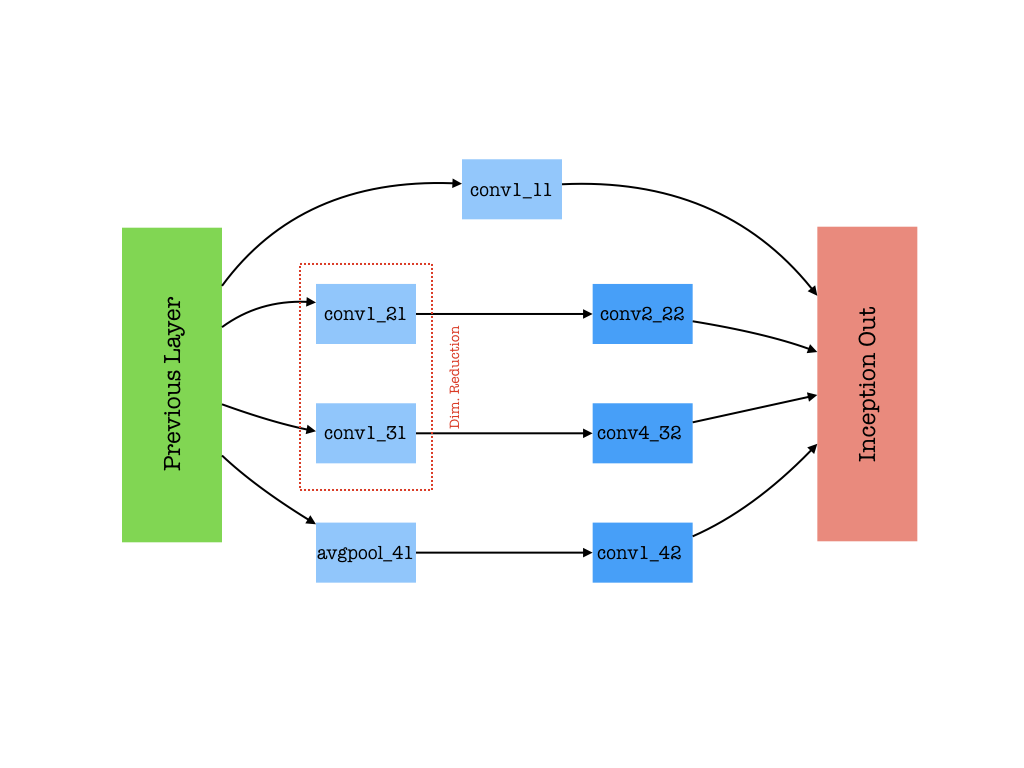

In [ ]:
with graph.as_default():
    
    # convolution: input to output of inception (size=1)
    # (batch, 8, 36) --> (batch, 8, 36)
    conv1_11 = tf.layers.conv1d(inputs=max_pool_4, filters=36, kernel_size=1, strides=1,
                               padding='same', activation = tf.nn.relu)
    
    # convolution: input to middle layer of inception (size=1)
    # (batch, 8, 36) --> (batch, 8, 18)
    conv1_21 = tf.layers.conv1d(inputs=max_pool_4, filters=18, kernel_size=1, strides=1,
                               padding='same', activation = tf.nn.relu)
    
    # convolution: input to middle layer of inception (size=1)
    # (batch, 8, 36) --> (batch, 8, 18)
    conv1_31 = tf.layers.conv1d(inputs=max_pool_4, filters=18, kernel_size=1, strides=1,
                               padding='same', activation = tf.nn.relu)
    
    # average pool: input to middle layer of inception
    # (batch, 8, 36) --> (batch, 8, 36)
    avg_pool_41 = tf.layers.average_pooling1d(inputs=max_pool_4, pool_size=2, strides=1, padding='same')
    
    ## Middle layer of inception
    
    # convolution: middle to out layer of inception (size=2)
    # (batch, 8, 18) --> (batch, 8, 36)
    conv2_22 = tf.layers.conv1d(inputs=conv1_21, filters=36, kernel_size=2, strides=1,
                               padding='same', activation=tf.nn.relu)
    
    # convolution: middle to out layer of inception (size=4)
    # (batch, 8, 18) --> (batch, 8, 36)
    conv4_32 = tf.layers.conv1d(inputs=conv1_31, filters=36, kernel_size=4, strides=1,
                               padding='same', activation=tf.nn.relu)
    
    # convolution: middle to out layer of inception (size=1)
    # (batch, 8, 36) --> (batch, 8, 36)
    conv1_42 = tf.layers.conv1d(inputs=avg_pool_41, filters=36, kernel_size=1, strides=1,
                               padding='same', activation=tf.nn.relu)
    
    ## Out layer: Concatenate filters
    # (batch, 8, 4*36)
    inception_out = tf.concat([conv1_11, conv2_22, conv4_32, conv1_42], axis=2)

Flatten and pass to the classifier

In [ ]:
    # Flatten and add dropout
    flat = tf.reshape(inception_out, (-1, 8*144))
    flat = tf.nn.dropout(flat, keep_prob=keep_prob_)
    
    # Predictions
    logits = tf.layers.dense(flat, n_classes)
    
    # Cost function and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))
    optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost)
    
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Train the network

In [ ]:
if (os.path.exists('checkpoints-cnn') == False):
    !mkdir checkpoints-cnn

In [ ]:
validation_acc = []
validation_loss = []

train_acc = []
train_loss = []

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
   
    # Loop over epochs
    for e in range(epochs):
        
        # Loop over batches
        for x,y in get_batches(X_tr, y_tr, batch_size):
            
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, learning_rate_ : learning_rate}
            
            # Loss
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)
            
            # Print at each 5 iters
            if (iteration % 5 == 0):
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Train loss: {:6f}".format(loss),
                      "Train acc: {:.6f}".format(acc))
            
            # Compute validation loss at every 10 iterations
            if (iteration%10 == 0):                
                val_acc_ = []
                val_loss_ = []
                
                for x_v, y_v in get_batches(X_vld, y_vld, batch_size):
                    # Feed
                    feed = {inputs_ : x_v, labels_ : y_v, keep_prob_ : 1.0}  
                    
                    # Loss
                    loss_v, acc_v = sess.run([cost, accuracy], feed_dict = feed)                    
                    val_acc_.append(acc_v)
                    val_loss_.append(loss_v)
                
                # Print info
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Validation loss: {:6f}".format(np.mean(val_loss_)),
                      "Validation acc: {:.6f}".format(np.mean(val_acc_)))
                
                # Store
                validation_acc.append(np.mean(val_acc_))
                validation_loss.append(np.mean(val_loss_))
            
            # Iterate 
            iteration += 1
    
    saver.save(sess,"checkpoints-cnn/har.ckpt")

In [ ]:
# Plot training and test loss
t = np.arange(iteration-1)

plt.figure(figsize = (6,6))
plt.plot(t, np.array(train_loss), 'r-', t[t % 10 == 0], np.array(validation_loss), 'b*')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Plot Accuracies
plt.figure(figsize = (6,6))

plt.plot(t, np.array(train_acc), 'r-', t[t % 10 == 0], validation_acc, 'b*')
plt.xlabel("iteration")
plt.ylabel("Accuray")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Evaluate on test set

In [ ]:
test_acc = []

with tf.Session(graph=graph) as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints-cnn'))
    
    for x_t, y_t in get_batches(X_test, y_test, batch_size):
        feed = {inputs_: x_t,
                labels_: y_t,
                keep_prob_: 1}
        
        batch_acc = sess.run(accuracy, feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.6f}".format(np.mean(test_acc)))

In [ ]:
# (Inline plots: )
%matplotlib inline

font = {
    'family' : 'SAR',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)

width = 12
height = 12
plt.figure(figsize=(width, height))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
plt.plot(indep_train_axis, np.array(train_losses),     "b--", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "g--", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
plt.plot(indep_test_axis, np.array(test_losses),     "b-", label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies), "g-", label="Test accuracies")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training iteration')

plt.show()

The multi-class confusion matrix and metrics

https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition

In [ ]:
# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.rainbow )
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

https://github.com/stuarteiffert/RNN-for-Human-Activity-Recognition-using-2D-Pose-Input

In [ ]:
# (Inline plots: )
%matplotlib inline

font = {
    'family' : 'Bitstream Vera Sans',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)

width = 12
height = 12
plt.figure(figsize=(width, height))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
#plt.plot(indep_train_axis, np.array(train_losses),     "b--", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "g--", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
#plt.plot(indep_test_axis, np.array(test_losses), "b-", linewidth=2.0, label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies), "b-", linewidth=2.0, label="Test accuracies")
print len(test_accuracies)
print len(train_accuracies)

plt.title("Training session's Accuracy over Iterations")
plt.legend(loc='lower right', shadow=True)
plt.ylabel('Training Accuracy')
plt.xlabel('Training Iteration')

plt.show()

# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
print("Created using test set of {} datapoints, normalised to % of each class in the test dataset".format(len(y_test)))
confusion_matrix = metrics.confusion_matrix(y_test, predictions)


#print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100


# Plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.Blues
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 2 HAR LSTM

# LSTM Model 1

In [ ]:
# Imports
import numpy as np
import os
from utils.utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Prepare data

In [ ]:
#X_train, labels_train, list_ch_train = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_all_xy_csv.csv", split="train") # train
#X_test, labels_test, list_ch_test = read_data(data_path=("/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_test1.csv", split="test") # test

X_train, labels_train, list_ch_train = read_data(data_path=('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv', split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path=('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv', split="test") # test
  
assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [ ]:
# Normalize
X_train, X_test = standardize(X_train, X_test)
# Data
#X_train = "/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw__all_xy_csv.csv;
#X_test = "/content/drive/My Drive/SAR23/SAR_v2.3/SAR_v2.3_raw_test1.csv;

Dataset_Train = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_all_xy_csv.csv')
Dataset_Test = pd.read_csv('E:\\Google Colab/SAR_v2.3\\SAR_v2.3_raw_test1.csv')


Train/Validation Split

In [ ]:
X_tr, X_vld, lab_tr, lab_vld = train_test_split(X_train, labels_train, 
                                                stratify = labels_train,
                                                random_state = 123)

One-hot encoding

In [ ]:
y_tr = one_hot(lab_tr)
y_vld = one_hot(lab_vld)
y_test = one_hot(labels_test)

Hyperparameters

In [ ]:
# Imports
import tensorflow as tf

lstm_size = 27         # 3 times the amount of channels
lstm_layers = 2        # Number of layers
batch_size = 600       # Batch size
seq_len = 128          # Number of steps
learning_rate = 0.0001  # Learning rate (default is 0.001)
epochs = 1000

# Fixed
n_classes = 6
n_channels = 9

Construct the graph
Placeholders

In [ ]:
graph = tf.Graph()

# Construct placeholders
with graph.as_default():
    inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
    labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
    keep_prob_ = tf.placeholder(tf.float32, name = 'keep')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate')

Construct inputs to LSTM

In [ ]:
with graph.as_default():
    # Construct the LSTM inputs and LSTM cells
    lstm_in = tf.transpose(inputs_, [1,0,2]) # reshape into (seq_len, N, channels)
    lstm_in = tf.reshape(lstm_in, [-1, n_channels]) # Now (seq_len*N, n_channels)
    
    # To cells
    lstm_in = tf.layers.dense(lstm_in, lstm_size, activation=None) # or tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh?
    
    # Open up the tensor into a list of seq_len pieces
    lstm_in = tf.split(lstm_in, seq_len, 0)
    
    # Add LSTM layers
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    initial_state = cell.zero_state(batch_size, tf.float32)

Define forward pass, cost function and optimizer

In [ ]:
with graph.as_default():
    outputs, final_state = tf.contrib.rnn.static_rnn(cell, lstm_in, dtype=tf.float32,
                                                     initial_state = initial_state)
    
    # We only need the last output tensor to pass into a classifier
    logits = tf.layers.dense(outputs[-1], n_classes, name='logits')
    
    # Cost function and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))
    #optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost) # No grad clipping
    
    # Grad clipping
    train_op = tf.train.AdamOptimizer(learning_rate_)

    gradients = train_op.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients]
    optimizer = train_op.apply_gradients(capped_gradients)
    
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Train the network

In [ ]:
if (os.path.exists('checkpoints') == False):
    !mkdir checkpoints

In [ ]:
validation_acc = []
validation_loss = []

train_acc = []
train_loss = []

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    
    for e in range(epochs):
        # Initialize 
        state = sess.run(initial_state)
        
        # Loop over batches
        for x,y in get_batches(X_tr, y_tr, batch_size):
            
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, 
                    initial_state : state, learning_rate_ : learning_rate}
            
            loss, _ , state, acc = sess.run([cost, optimizer, final_state, accuracy], 
                                             feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)
            
            # Print at each 5 iters
            if (iteration % 5 == 0):
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Train loss: {:6f}".format(loss),
                      "Train acc: {:.6f}".format(acc))
            
            # Compute validation loss at every 25 iterations
            if (iteration%25 == 0):
                
                # Initiate for validation set
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                
                val_acc_ = []
                val_loss_ = []
                for x_v, y_v in get_batches(X_vld, y_vld, batch_size):
                    # Feed
                    feed = {inputs_ : x_v, labels_ : y_v, keep_prob_ : 1.0, initial_state : val_state}
                    
                    # Loss
                    loss_v, state_v, acc_v = sess.run([cost, final_state, accuracy], feed_dict = feed)
                    
                    val_acc_.append(acc_v)
                    val_loss_.append(loss_v)
                
                # Print info
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Validation loss: {:6f}".format(np.mean(val_loss_)),
                      "Validation acc: {:.6f}".format(np.mean(val_acc_)))
                
                # Store
                validation_acc.append(np.mean(val_acc_))
                validation_loss.append(np.mean(val_loss_))
            
            # Iterate 
            iteration += 1
    
    saver.save(sess,"checkpoints/har-lstm.ckpt")

In [ ]:
# Plot training and test loss
t = np.arange(iteration-1)

plt.figure(figsize = (6,6))
plt.plot(t, np.array(train_loss), 'r-', t[t % 25 == 0], np.array(validation_loss), 'b*')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Plot Accuracy
plt.figure(figsize = (6,6))

plt.plot(t, np.array(train_acc), 'r-', t[t % 25 == 0], validation_acc, 'b*')
plt.xlabel("iteration")
plt.ylabel("Accuray")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Evaluate on test set

In [ ]:
test_acc = []

with tf.Session(graph=graph) as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    
    for x_t, y_t in get_batches(X_test, y_test, batch_size):
        feed = {inputs_: x_t,
                labels_: y_t,
                keep_prob_: 1,
                initial_state: test_state}
        
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.6f}".format(np.mean(test_acc)))

LSTM Model 2

In [ ]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

https://github.com/srvds/Human-Activity-Recognition/blob/master/HAR_LSTM.ipynb

In [ ]:

# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [ ]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [ ]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:

# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

In [ ]:
# Initializing parameters
#epochs = 30
#batch_size = 16
#n_hidden = 32
#pv = 0.5

epochs = 30
batch_size = 32
n_hidden = 128
pv = 0.25

Defining the Architecture of LSTM

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
# Adding a dropout layer
model.add(Dropout(pv))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

In [ ]:
score = model.evaluate(X_test, Y_test)

LSTM Model 3

stacking 2 LSTM

In [ ]:
epochs1 = 30
batch_size1= 32
n_hidden1 = 128
n_hidden2 =64
pv1 = 0.2
pv2 = 0.5

Defining the Architecture of LSTM

In [ ]:
# Initiliazing the sequential model
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(n_hidden1, return_sequences=True, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(pv1))

model1.add(LSTM(n_hidden2))
# Adding a dropout layer
model1.add(Dropout(pv2))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

In [ ]:
# Compiling the model
model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model1.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs1)

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model1.predict(X_test)))

In [ ]:
score1 = model1.evaluate(X_test, Y_test)

In [ ]:
score1

# 3 HAR CNN + LSTM

# (Code for Prepare data, Train/Validation Split, One-hot encoding are same as above) 

Hyperparameters

In [ ]:
# Imports
import tensorflow as tf
lstm_size = 27         # 3 times the amount of channels
lstm_layers = 2        # Number of layers
batch_size = 600       # Batch size
seq_len = 128          # Number of steps
learning_rate = 0.0001  # Learning rate (default is 0.001)
epochs = 1000

# Fixed
n_classes = 6
n_channels = 9

Construct the graph
Placeholders

In [ ]:
graph = tf.Graph()

# Construct placeholders
with graph.as_default():
    inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
    labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
    keep_prob_ = tf.placeholder(tf.float32, name = 'keep')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate')

Build Convolutional Layer(s)

Questions:

Should we use a different activation? Like tf.nn.tanh?
Should we use pooling? average or max?

In [ ]:
# Convolutional layers
with graph.as_default():
    # (batch, 128, 9) --> (batch, 128, 18)
    conv1 = tf.layers.conv1d(inputs=inputs_, filters=18, kernel_size=2, strides=1, 
                             padding='same', activation = tf.nn.relu)
    n_ch = n_channels *2

Pass to LSTM cells

In [ ]:
with graph.as_default():
    # Construct the LSTM inputs and LSTM cells
    lstm_in = tf.transpose(conv1, [1,0,2]) # reshape into (seq_len, batch, channels)
    lstm_in = tf.reshape(lstm_in, [-1, n_ch]) # Now (seq_len*N, n_channels)
    
    # To cells
    lstm_in = tf.layers.dense(lstm_in, lstm_size, activation=None) # or tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh?
    
    # Open up the tensor into a list of seq_len pieces
    lstm_in = tf.split(lstm_in, seq_len, 0)
    
    # Add LSTM layers
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    initial_state = cell.zero_state(batch_size, tf.float32)

Define forward pass and cost function

In [ ]:
with graph.as_default():
    outputs, final_state = tf.contrib.rnn.static_rnn(cell, lstm_in, dtype=tf.float32,
                                                     initial_state = initial_state)
    
    # We only need the last output tensor to pass into a classifier
    logits = tf.layers.dense(outputs[-1], n_classes, name='logits')
    
    # Cost function and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))
    #optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost) # No grad clipping
    
    # Grad clipping
    train_op = tf.train.AdamOptimizer(learning_rate_)

    gradients = train_op.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients]
    optimizer = train_op.apply_gradients(capped_gradients)
    
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Train the network

In [ ]:
if (os.path.exists('checkpoints-crnn') == False):
    !mkdir checkpoints-crnn

In [ ]:
validation_acc = []
validation_loss = []

train_acc = []
train_loss = []

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    
    for e in range(epochs):
        # Initialize 
        state = sess.run(initial_state)
        
        # Loop over batches
        for x,y in get_batches(X_tr, y_tr, batch_size):
            
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, 
                    initial_state : state, learning_rate_ : learning_rate}
            
            loss, _ , state, acc = sess.run([cost, optimizer, final_state, accuracy], 
                                             feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)
            
            # Print at each 5 iters
            if (iteration % 5 == 0):
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Train loss: {:6f}".format(loss),
                      "Train acc: {:.6f}".format(acc))
            
            # Compute validation loss at every 25 iterations
            if (iteration%25 == 0):
                
                # Initiate for validation set
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                
                val_acc_ = []
                val_loss_ = []
                for x_v, y_v in get_batches(X_vld, y_vld, batch_size):
                    # Feed
                    feed = {inputs_ : x_v, labels_ : y_v, keep_prob_ : 1.0, initial_state : val_state}
                    
                    # Loss
                    loss_v, state_v, acc_v = sess.run([cost, final_state, accuracy], feed_dict = feed)
                    
                    val_acc_.append(acc_v)
                    val_loss_.append(loss_v)
                
                # Print info
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Validation loss: {:6f}".format(np.mean(val_loss_)),
                      "Validation acc: {:.6f}".format(np.mean(val_acc_)))
                
                # Store
                validation_acc.append(np.mean(val_acc_))
                validation_loss.append(np.mean(val_loss_))
            
            # Iterate 
            iteration += 1
    
    saver.save(sess,"checkpoints-crnn/har.ckpt")

In [ ]:
# Plot training and test loss
t = np.arange(iteration-1)

plt.figure(figsize = (6,6))
plt.plot(t, np.array(train_loss), 'r-', t[t % 25 == 0], np.array(validation_loss), 'b*')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Plot Accuracies
plt.figure(figsize = (6,6))

plt.plot(t, np.array(train_acc), 'r-', t[t % 25 == 0], validation_acc, 'b*')
plt.xlabel("iteration")
plt.ylabel("Accuray")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Evaluate on test set

In [ ]:
test_acc = []

with tf.Session(graph=graph) as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints-crnn'))
    
    for x_t, y_t in get_batches(X_test, y_test, batch_size):
        feed = {inputs_: x_t,
                labels_: y_t,
                keep_prob_: 1}
        
        batch_acc = sess.run(accuracy, feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.6f}".format(np.mean(test_acc)))

let's plot this simply

In [ ]:
# (Inline plots: )
%matplotlib inline

font = {
    'family' : 'SAR',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)

width = 12
height = 12
plt.figure(figsize=(width, height))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
plt.plot(indep_train_axis, np.array(train_losses),     "b--", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "g--", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
plt.plot(indep_test_axis, np.array(test_losses),     "b-", label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies), "g-", label="Test accuracies")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training iteration')

plt.show()

The multi-class confusion matrix and metrics

In [ ]:
# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Confusion matrix and metrics Model 2

In [ ]:

# Draw the Confusion matrix
def plot_Confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Blues, labels=None):
  # Show the confusion_matrix as an image
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  #plt.title(title)
  plt.title("Confusion matrix \n(normalised to % of total test data)")
  plt.colorbar()
  #Put labels on axis
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, LABELS, rotation=45) #rotation=90
plt.yticks(tick_marks, LABELS)
#Pack it together
plt.tight_layout()
# Render the DataFrame as a table for easy view
cmpd = pd.DataFrame(cm, columns=labels)
cmpd.index = LABELS
display(HTML('<b>Confusion matrix</b>'))
display(cmpd)
plt.ylabel('Real Activity')
plt.xlabel('Predicted Activity')

# Labels
labels = map(lambda x: x[1], activity_map)
#Compute Confusion matrix
cm = confusion_matrix(y_real, y_pred, labels=labels)
# Show the Confusion matrix
plt.figure()
plot_Confusion_matrix(cm, labels=labels)
plt.show()



http://data-bloom.com/notebooks/Human%20Activity%20Recognition.html

In [ ]:
# Labels
labels = map(lambda x: x[1], activity_map)

#Compute Confusion matrix
cm = confusion_matrix(y_real, y_pred, labels=labels)

# Show the Confusion matrix
plt.figure()
plot_Confusion_matrix(cm, labels=labels)
plt.show()


# 5 Tree Booster

Loading data

In [ ]:
library(plyr)
library(dplyr)
library(xgboost)
library(MLmetrics)
library(ggplot2)
library(grid)
library(gridExtra)

source('prepare_data.R')

Data cleaning and preparation is performed using prepare_data.py. Let’s first visualize the data using the principal components

In [ ]:
X_tr <- X_full %>% filter(is.train == 1) %>% dplyr::select(-is.train) # Select training data
pca_tr <- prcomp(X_tr) # Get principal components
# Plot  
dat_pca <- data.frame(pc1 = pca_tr$x[,1], pc2 = pca_tr$x[,2], pc3 = pca_tr$x[,3], 
                      label = as.factor(y_train$label))



levels(dat_pca$label) <- c('Hip-adducator-stretch','Hip-Abduction','Towel-hamstring-stretch','Hip-Fracture',
'Lumbar-Rotation','Lumbar-Flexsion','Abduction','Adduction','Horizontal-Flexion','Horizontal-extension','Vertical-Flexion','Shoulder-Impingement')



g0 <- ggplot(data = dat_pca, aes(pc1, pc2)) + geom_point(aes(color = label))
g0

If we were to look at principal components with lower variance

In [ ]:
# Plot  
dat_pca <- data.frame(pc3 = pca_tr$x[,3], pc4 = pca_tr$x[,4], pc5 = pca_tr$x[,5], 
                      label = as.factor(y_train$label))
levels(dat_pca$label) <- c('Hip-adducator-stretch','Hip-Abduction','Towel-hamstring-stretch','Hip-Fracture',
'Lumbar-Rotation','Lumbar-Flexsion','Abduction','Adduction','Horizontal-Flexion','Horizontal-extension','Vertical-Flexion','Shoulder-Impingement')
g1 <- ggplot(data = dat_pca, aes(pc4, pc5)) + geom_point(aes(color = label))
g1

Gradient Boosting: Tree Booster

In [ ]:
library(xgboost)
# Split back into train/test
X_tr <- X_full %>% filter(is.train == 1) %>% dplyr::select(-is.train)
X_tst <- X_full %>% filter(is.train == 0) %>% dplyr::select(-is.train)
# XGboost wants levels to start with 0
y_tr <- as.factor(y_train$label)
y_tr <- revalue(y_tr, c('6'='5', '5'='4', '4'='3', '3'='2', '2'='1', '1'='0'))
y_tr <- as.numeric(levels(y_tr))[y_tr]
y_tst <- as.factor(y_test$label)
y_tst <- revalue(y_tst, c('6'='5', '5'='4', '4'='3', '3'='2', '2'='1', '1'='0'))
y_tst <- as.numeric(levels(y_tst))[y_tst]
# XGB style matrices
dtrain <- xgb.DMatrix(as.matrix(X_tr), label = y_tr)
dtest <- xgb.DMatrix(as.matrix(X_tst), label = y_tst)
watchlist <- list(train=dtrain, test=dtest)

fit the tree booster

In [ ]:
# Use best model params
params <- list(booster = "gbtree",
               eval_metric = "mlogloss",
               objective = "multi:softprob",
               eta = 0.50,     
               max_depth = 2, 
               gamma = 0.0,    
               min_child_weight = 0, 
               colsample_bytree = 0.2,
               subsample = 1)
modxgb <- xgb.train(params = params,
                    data = dtrain,
                    num_class = 6,
                    nrounds = 499,
                    watchlist = watchlist,
                    verbose = 0) # Change this to 1 to watch the progress

the feature importances

In [ ]:
# Importance matrix
importance_matrix <- xgb.importance(model = modxgb) %>% 
  mutate(Feature = as.integer(Feature))
top10 <- importance_matrix[1:10, ]$Feature
top10 <- paste0("f", top10)  # Select top 10 fetures from importance
# Names of these features
feat_names_10 <- feat_names %>% filter(code %in% top10) %>% 
  mutate(code = substring(code, 2)) %>%
  mutate(code = as.integer(code))
reord <- match(feat_names_10$code, importance_matrix[1:10,]$Feature)
feat_names_10 %>% dplyr::slice(reord)

plot the importance as a function of Gain in trees split when a specific feature is used

In [ ]:
plt.data <- importance_matrix[1:10, ]
plt.data$Feature <- feat_names_10 %>% dplyr::slice(reord) %>% dplyr::select(feature)
xgb.plot.importance(plt.data)

test the model performance on the test set

In [ ]:
# Predict
pred_tst <- predict(modxgb, newdata = dtest)
# Reshape in N x n_class
pred_matrix <- matrix(pred_tst, nrow = nrow(X_tst), byrow = TRUE) # Reshape for class probs
# Accuracy
pred_labels <- apply(pred_matrix, 1, which.max)
cat("Accuracy:", sum(pred_labels == y_test$label) / length(y_test$label), "\n")

In [ ]:
# One-hot encoding and multi-class log loss
expanded_tst <- diag(6)
expanded_tst <- t(expanded_tst[, y_test$label])
cat("MLogLoss: ", mlogloss(pred_matrix, expanded_tst), "\n")

The confusion matrix provides us information on how well we did for each class

In [ ]:
library(caret)
confusionMatrix(pred_labels, y_test$label)

Gradient Boosting: Linear Booster

The hyperparameters determined from 5-fold CV

In [ ]:
# Use best model params
params <- list(booster = "gblinear",
               eval_metric = "mlogloss",
               objective = "multi:softprob",
               alpha = 0.1,
               lambda = 1,
               eta = 0.3)
modxgb <- xgb.train(params = params,
                    data = dtrain,
                    num_class = 6,
                    nrounds = 497,
                    watchlist = watchlist,
                    verbose = 0) # Change this to 1 to watch the progress

predict on the test set

In [ ]:
# Predict
pred_tst <- predict(modxgb, newdata = dtest)
# Reshape in N x n_class
pred_matrix <- matrix(pred_tst, nrow = nrow(X_tst), byrow = TRUE) # Reshape for class probs
# Accuracy
pred_labels <- apply(pred_matrix, 1, which.max)
cat("Accuracy:", sum(pred_labels == y_test$label) / length(y_test$label), "\n")

In [ ]:
# Multi-class log loss
cat("MLogLoss: ", mlogloss(pred_matrix, expanded_tst), "\n")

the confusion matrix

In [ ]:







confusionMatrix(pred_labels, y_test$label)